# Forest Cover Type Project Exploratory Data Analysis

In the Forest Cover Type competition, we are asked to predict the forest cover type (the predominant kind of tree cover) from cartographic variables. The purpose of this EDA notebook is to provide an overview of how python visualization tools can be used to understand the complex and large dataset. EDA is the first step in this workflow where the decision-making process is initiated for the feature selection. Some valuable insights can be obtained by looking at the distribution of the target, relationship to the target and link between the features.

The study area includes four wilderness areas located in the Roosevelt National Forest of Northern Colorado. Each observation is a 30m x 30m patch. There are seven forest cover types:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

# Data Fields
- **Elevation** elevation in meters
- **Aspect** aspect in degrees azimuth
- **Slope** slope in degrees
- **Horizontal_Distance_To_Hydrology** Horz dist to nearest surface water features
- **Vertical_Distance_To_Hydrology** Vert dist to nearest surface water features
- **Horizontal_Distance_To_Roadways** Horz dist to nearest roadway
- **Hillshade_9am** (0 to 255 index) hillshade index at 9am, summer solstice
- **Hillshade_Noon** (0 to 255 index) hillshade index at noon, summer solstice
- **Hillshade_3pm** (0 to 255 index) hillshade index at 3pm, summer solstice
- **Horizontal_Distance_To_Fire_Points** Horz dist to nearest wildfire ignition points
- **Wilderness_Area** (4 binary cols, 0=abs or 1=pres) wilderness area designation
- **Soil_Type** (40 binary cols, 0=abs or 1=pres) soil type designation
- **Cover_Type** (7 types) forest cover type designation

The wilderness areas are:
1. Rawah
2. Neota
3. Comanche Peak
4. Cache la Poudre

# Load Data & Setup
The first section reads in the train data `train`, sees the shape of the data and check the `dtypes` to see if there are any need for pre-processing.

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('../input/forest-cover-type-prediction/train.csv')

# display train data
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [3]:
# size of data frame
train.shape

(15120, 56)

Since all variables are numeric integers, there are no need for further conversions.

In [4]:
# look at the data types of each feature and see if there needs to be any pre-processing
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

# Exploratory Data Analysis
- Our dataset has **54** features and **1** target variable, `Cover_Type`. 
- From 54 features, 10 are numeric and 44 are categorical.
- From 44 categorical, 40 are `Soil_Type` and 4 of `Wilderness_Area`
- These are the following forest cover types in target variable `Cover_Type`:
    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz

# Data Exploration
## Feature Statistics
- Part 1. Describe **numerical features**
- Part 2. Describe **binary/categorical features**

In [5]:
# extract all numerical features from train
num_features = train.iloc[:,1:11]

# extract all binary features from train
cat_features = train.iloc[:, 11:-1]

### Part 1. Describe numerical features
- **mean** of the feature varies from 16 to 2749.
- **std** for `Horizontal_Distance_To_Roadways` is the most spread out data, followed by `Horizontal_Distance_To_Fire_Points` and `Elevation`.
- The most desnsed and near to mean is `Slope` followed by all 3 features of `Hillshade`. 
    - See **Boxplot #1** in *Feature Visualization Section*
- All features have a minimum value of 0 except `Elevation` and `Vertical_Distance_To_Hydrology` features.
    - `Elevation` has the highest minimum value and `Vertical_Distance_To_Hydrology` has a negative value.
- `Hillshades` features except `Hillshade_3pm` have a similar maximum value.
- `Horizontal_Distance_To_Fire_Points` has the highest maximum value followed by `Horizontal_Distance_To_Roadways` features. They also have the highest ranges of all features.
- `Slope` has the lowest maximum value and range. The `Aspect` feature follows closely behind this same concept.

It is good to note that the reason some features are widely spread and have high values, is because 5 out of the 10 variables are measured in meters. These variables are: `Elevation`,`Horizontal_Distance_To_Hydrology`,`Vertical_Distance_To_Hydrology`,`Horizontal_Distance_To_Roadways`,`Horizontal_Distance_To_Fire_Points`. This makes sense that these have high values and ranges.


Features like `Aspect` and `Slope` are measured in degrees which means there maximum values can't go above 360. `Hillshade` features can only take on a maximum value of 255.


In [6]:
num_features.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000


### Part 2. Describe categorical features
- Categorical variables will either have a value of 0 or 1. The **mean** can tell us useful information.
    - `Wilderness_Area3` followed by `Wilderness_Area4` has the highest mean. This signifies that these variables have the most presence in the data compared to other Wilderness Area. Most of our features will consist of `Wilderness_Area3` and `Wilderness_Area4`.
    - The least amount of observations will be seen from `Wilderness_Area2`.
- One more to notice here is that when we add all the mean of `Wilderness_Area` we get a result 0.999999 which is approximately 1. This may mean all the observations can be from any one Wilderness Area.
- Probability wise, the next observation that we get will have a 42.0% probability take from `Wilderness_Area3`, 30.9% probability take from `Wilderness_Area4` and so on for others. 
    - We can look into more details with the following plot in the *Feature Visualization Section*: **Barplot #2**.
- Probability wise, we can document the same for `Soil_Types` too. 
    - We can look at **Barplot #3** in *Feature Visualization Section*.


By looking at these statistics of two different data types, we can see that there are different spreads and uneven amount of distribution. In this case we will feature scale these so that all the features have similar ranges between 0 and 1. Some algorithms can be sensitive to high values hence giving us inappropriate results while some algorithms are not.

In [7]:
cat_features.describe()

,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,...,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,0.237897,0.033003,0.419907,0.309193,0.023479,0.041204,0.063624,0.055754,0.010913,0.042989,...,0.021958,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357
std,0.425810,0.178649,0.493560,0.462176,0.151424,0.198768,0.244091,0.229454,0.103896,0.202840,...,0.146550,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Feature Skew
- For normal distribution, the skewness should be zero. Thus any balanced data should have a skewness near zero.
- Negative values indicate data is skewed left. The left tail is long relative to the right tail.
- Positive values indicate data is skewed right. The right tail is long relative the left tail.

In [8]:
skew = train.skew()
skew_df = pd.DataFrame(skew, index=None, columns=['Skewness'])

In [9]:
print(skew)

Id                                      0.000000
Elevation                               0.075640
Aspect                                  0.450935
Slope                                   0.523658
Horizontal_Distance_To_Hydrology        1.488052
Vertical_Distance_To_Hydrology          1.537776
Horizontal_Distance_To_Roadways         1.247811
Hillshade_9am                          -1.093681
Hillshade_Noon                         -0.953232
Hillshade_3pm                          -0.340827
Horizontal_Distance_To_Fire_Points      1.617099
Wilderness_Area1                        1.231244
Wilderness_Area2                        5.228781
Wilderness_Area3                        0.324594
Wilderness_Area4                        0.825798
Soil_Type1                              6.294716
Soil_Type2                              4.617019
Soil_Type3                              3.575995
Soil_Type4                              3.872721
Soil_Type5                              9.416209
Soil_Type6          

### Skewness Inferences
- `Soil_Type8` and `Soil_Type25` has the highest skewness. This means that the mass of the distribution is concentrated to the left and has long tail to the right followed by `Soil_Type9, 28 and 26`. This is also called **right skewed distribution**. 
    - We can see here that mostly all of the observations will have a 0 value for this feature in the **Feature Visualization Section**: **Barplot #3**
- The `Hillshade` variables have a negatively skewed distribution.
- ML algorithm can be very sensitive to such ranges of data and can give us inappropriate/weak restuls. **Feature Scaling** will handle these as discussed earlier.

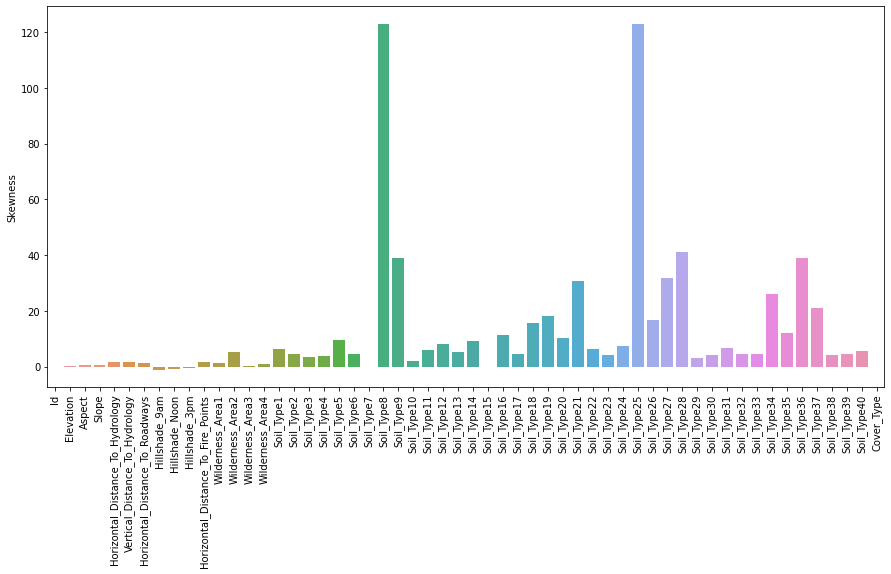

In [10]:
plt.figure(figsize=(15,7))
sns.barplot(x=skew_df.index, y='Skewness', data=skew_df)
var = plt.xticks(rotation=90)

### Class Distribution
Now we will look at the class distribution for `Cover_Type` by grouping it and calculating total occurrence.


We can see that `Cover_Type` has an equal distribution.

In [11]:
train.groupby('Cover_Type').size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

# Feature Visualization
In this section we will visualize the spread and outliers of the data of numerical features.

### Histogram #1: Numerical Features Inferences
- In conclusion, it seems all continuous numerical features are not normally distributed.
- `Slope`,`Horizontal_Distance_To_Hydrology`,`Vertical_Distance_To_Hydrology`,`Horizontal_Distance_To_Roadways`,
`Horizontal_Distance_To_Roadways`, and `Horizontal_Distance_To_Fire_Points` are **right skewed**.
- `Elevation`,`Hillshade_9am`,`Hillshade_3pm` are **left skewed**.

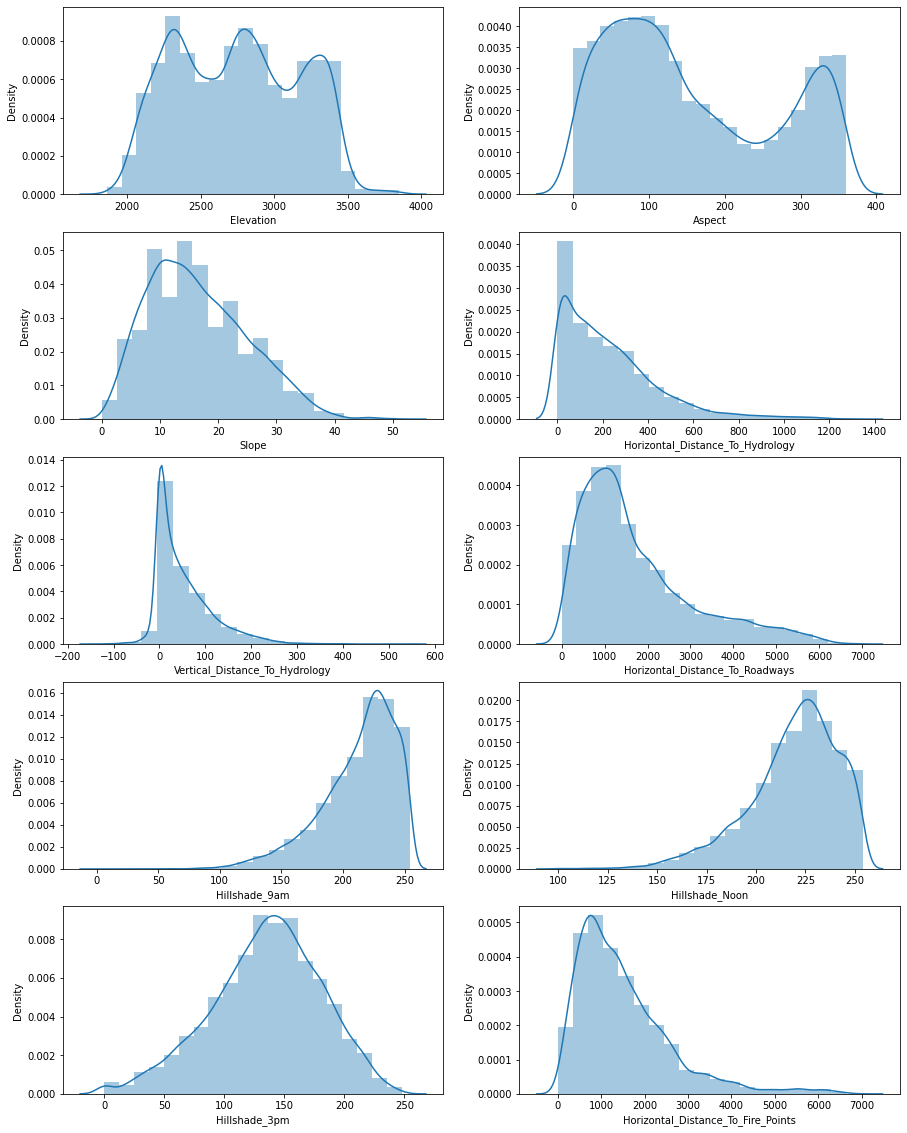

In [12]:
fig, ax = plt.subplots(5,2, figsize=(15,20))

sns.distplot(train.Elevation, bins=20, ax=ax[0,0])
sns.distplot(train.Aspect, bins=20, ax=ax[0,1])
sns.distplot(train.Slope, bins = 20, ax=ax[1,0]) 
sns.distplot(train.Horizontal_Distance_To_Hydrology, bins = 20, ax=ax[1,1])
sns.distplot(train.Vertical_Distance_To_Hydrology, bins = 20, ax=ax[2,0]) 
sns.distplot(train.Horizontal_Distance_To_Roadways, bins = 20, ax=ax[2,1]) 
sns.distplot(train.Hillshade_9am, bins = 20, ax=ax[3,0]) 
sns.distplot(train.Hillshade_Noon, bins = 20, ax=ax[3,1])
sns.distplot(train.Hillshade_3pm, bins = 20, ax=ax[4,0])
sns.distplot(train.Horizontal_Distance_To_Fire_Points, bins = 20, ax=ax[4,1])
plt.show()

# Feature Distribution
Now we will plot how `Wilderness_Area` and `Soil_Type` are distributed.

### Barplot #2: Number of Observations of Wilderness Areas Inferences:
- Visually, we can see that `Wilderness_Area3` and `Wilderness_Area4` has the most presence.
- `Wilderness_Area2` has the least amount of observations. Which confirms it will not have the most presence in our data.

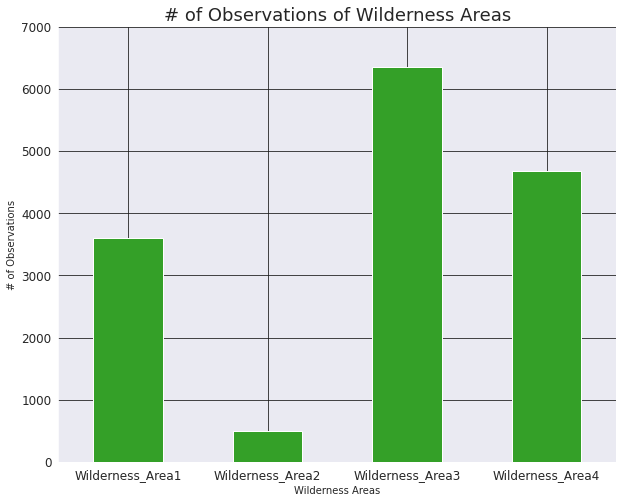

In [13]:
# split cat_features
wild_data, soil_data = cat_features.iloc[:,:4], cat_features.iloc[:,4:]

# plot bg
sns.set_style("darkgrid", {'grid.color':'.1'})
flatui = ["#e74c3c", "#34495e", "#2ecc71","#3498db"]

# use seaborn, pass colors to palette
palette = sns.color_palette(flatui)

# sum the data, plot bar
wild_data.sum().plot(kind='bar', figsize=(10,8), color='#34a028')
plt.title('# of Observations of Wilderness Areas', size=18)
plt.xlabel('Wilderness Areas')
plt.ylabel('# of Observations')
plt.ylim([0,7000])
plt.xticks(rotation='horizontal', size=12)
plt.yticks(size=12)

sns.despine()
plt.show()

In [14]:
# total count of each wilderness area
wild_data.sum()

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

### Barplot #3: Number of Observations of Soil Type Inferences:


Now we will plot the number of observations for `Soil Type`.
- In the bar plot below, we can see that there many different types of distributions: **normal distribution, bimodal distribution, unimodal distribution, and left & right-skewed distribution** showing up in pieces.
- The most observation is seen from `Soil_Type10` followed by `Soil_Type29`.
    - From a statistical analysis, `Soil_Type10` has a presence in 14.1% of observations in the data.
    - `Soil_Type10` also had the least skewed value of all in Soil Types as we had seen earlier in data exploration.
- The variable with the least amount of observations are `Soil_Type7` and `Soil_Type15`.
    - Soil Types has the most skewed values because these variables with a skew variable of 0 were so little, making it densely concentrated towards 0 and long flat tail to the right having form of **positively skewed distribution** or **right skewed distribution** (Details in *Feature Skew* Section).

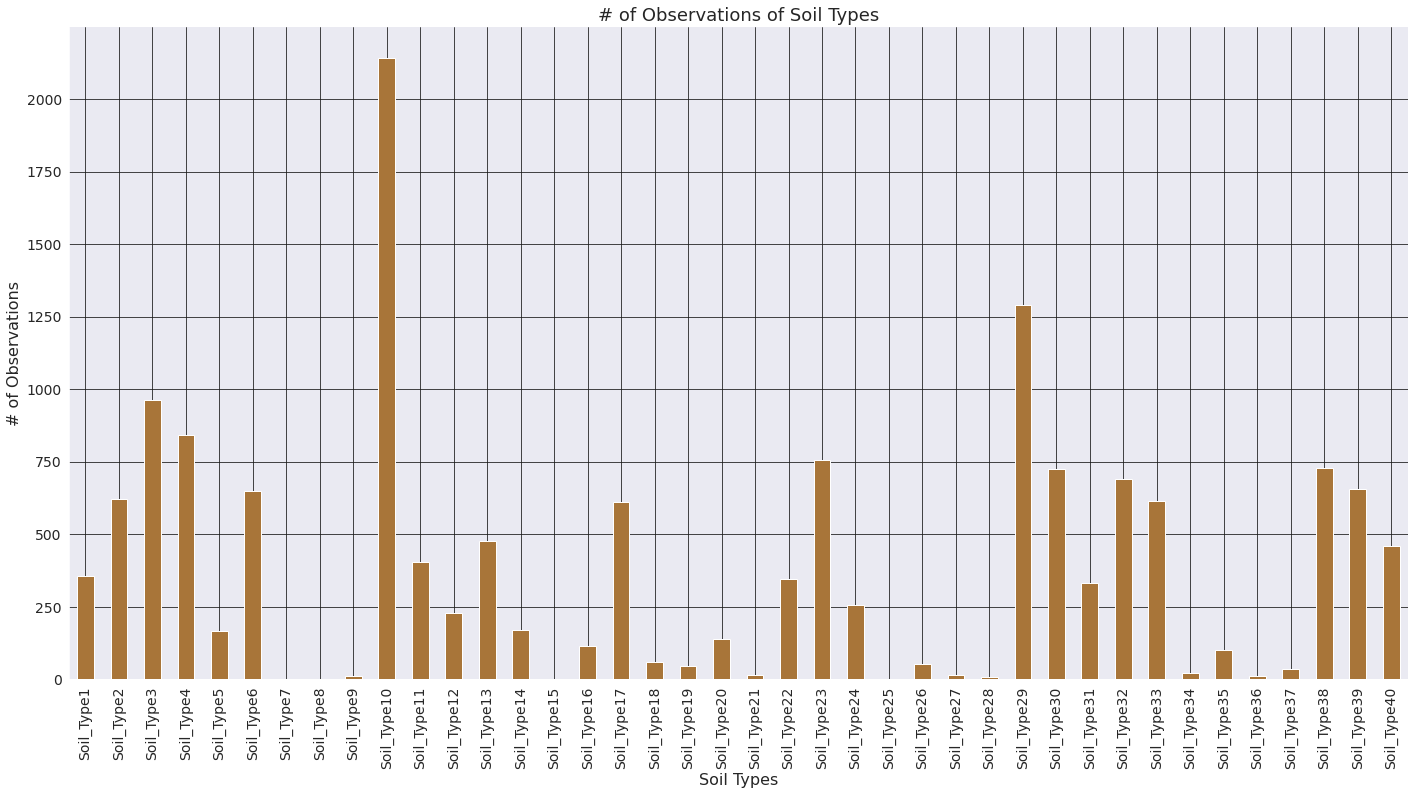

In [15]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# sum data, plot bar
soil_data.sum().plot(kind='bar', figsize=(24,12), color='#a87539')
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('Soil Types', size=16)
plt.ylabel('# of Observations', size=16)
plt.xticks(rotation=90, size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

In [16]:
# statistical description of highest observation of soil type
soil_data.loc[:,'Soil_Type10'].describe()

count    15120.000000
mean         0.141667
std          0.348719
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Soil_Type10, dtype: float64

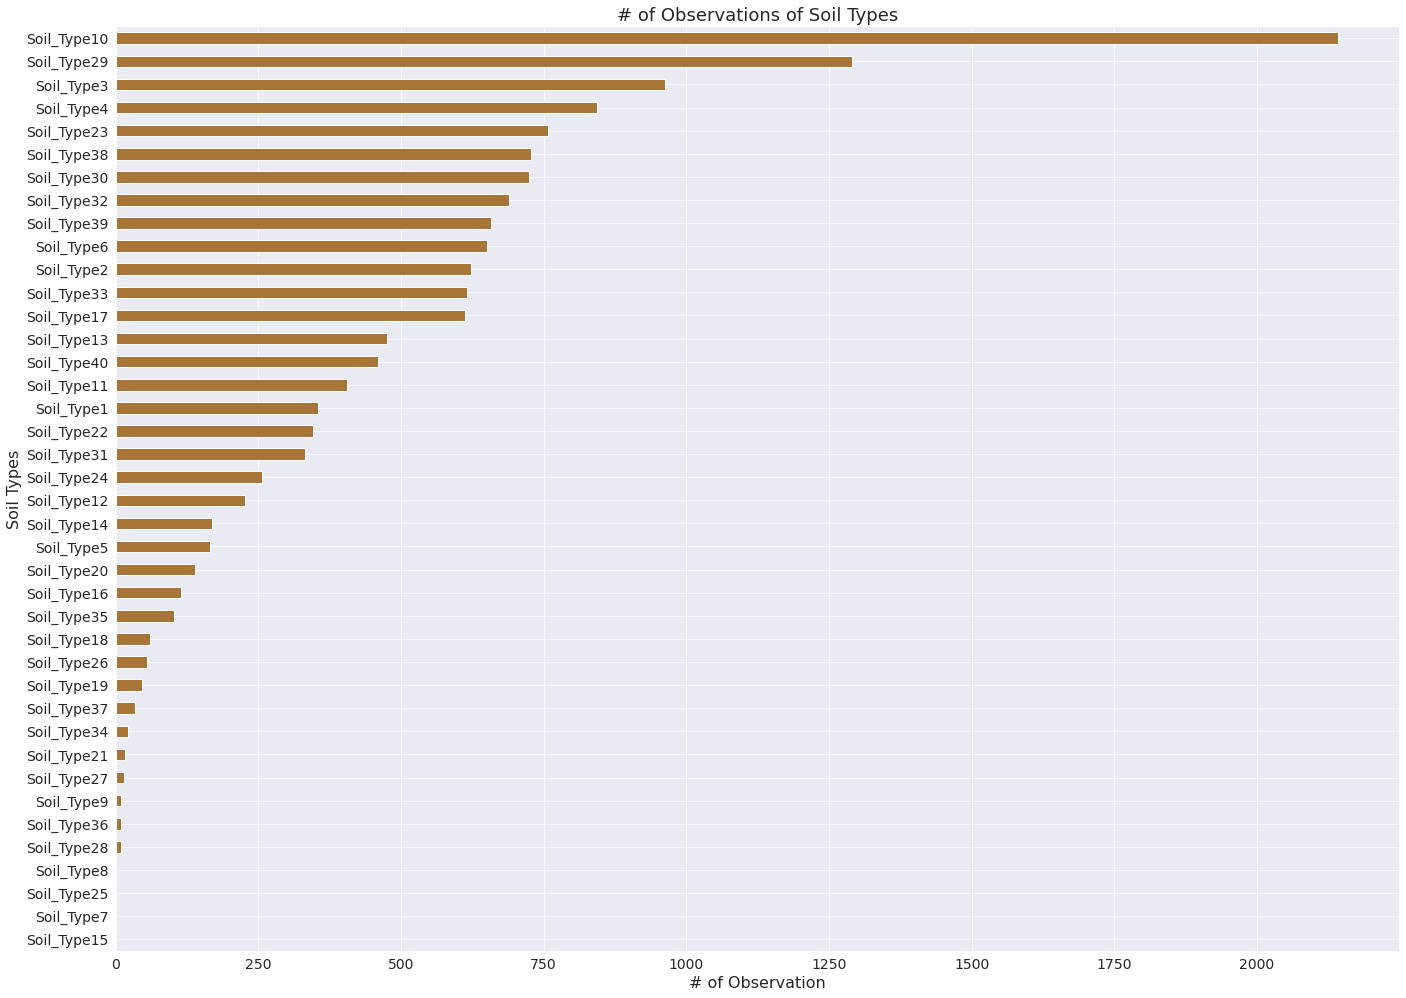

In [17]:
# plot bg
sns.set_style("darkgrid", {'grid_color': '.1'})

# sum soil data, pass it as a series
soil_sum = pd.Series(soil_data.sum())
soil_sum.sort_values(ascending=False, inplace=True)

# plot bar
soil_sum.plot(kind='barh', figsize=(23,17), color='#a87539')
plt.gca().invert_yaxis()
plt.title('# of Observations of Soil Types', size=18)
plt.xlabel('# of Observation', size=16)
plt.ylabel('Soil Types', size=16)
plt.xticks(rotation='horizontal',size=14)
plt.yticks(size=14)

sns.despine()
plt.show()

# Feature Comparison
Next we will compare each feature in our data to the target variable. This will help us visualize how much dense and distributed each target variable's class is compared to the feature.


### Violin Plot 4.1 Numerical Features Inferences:
- `Elevation`
    - `Cover_Type4` has the most forest cover at elevation between 2000m - 2500m.
    - `Cover_Type3` has the fewest presence around that same elevation.
    - `Cover_Type7` has observations of most elevated trees ranging as low as ~2800m to as high as ~3800m.
        - `Cover_Type7` max value in elevation did belong to this forest type.
        - This will be an important feature since every feature tells a different story to different classes of forest cover type. This could be useful in our algorithm.
- `Aspect`
    - This feature has a normal distribution for each class.
- `Slope`
    - Slope has lower values compared to most features as its measured in degrees and least to `Aspect` which is also measured in degrees.
    - It has the least maximum value of all features. Looking at the plot we can say that it belongs to `Cover_Type2`.
    - All classes have dense slope observations between 0-20 degrees.
- `Horizontal_Distance_To_Hydrology`
    - This has the right or positively skewed distribution where most of the values for all classes are towards 0-50m.
- `Vertical_Distance_To_Hydrology`
    - This is also positively skewed distribution but this takes on values much closer to 0 for all classes for most observations.
    - The highest value in this feature belongs to `Cover_Type2`. This feature also has the least minimum value. In this case, `Cover_Type2` has the most range of observations compared to other classes.
- `Hillshade_9am` and `Hillshade_Noon` are left or negatively skewed distribution where they take on max value between 200-250 index value for most observation in each class.
- `Hillshade_3pm` has a normal distribution for all classes.

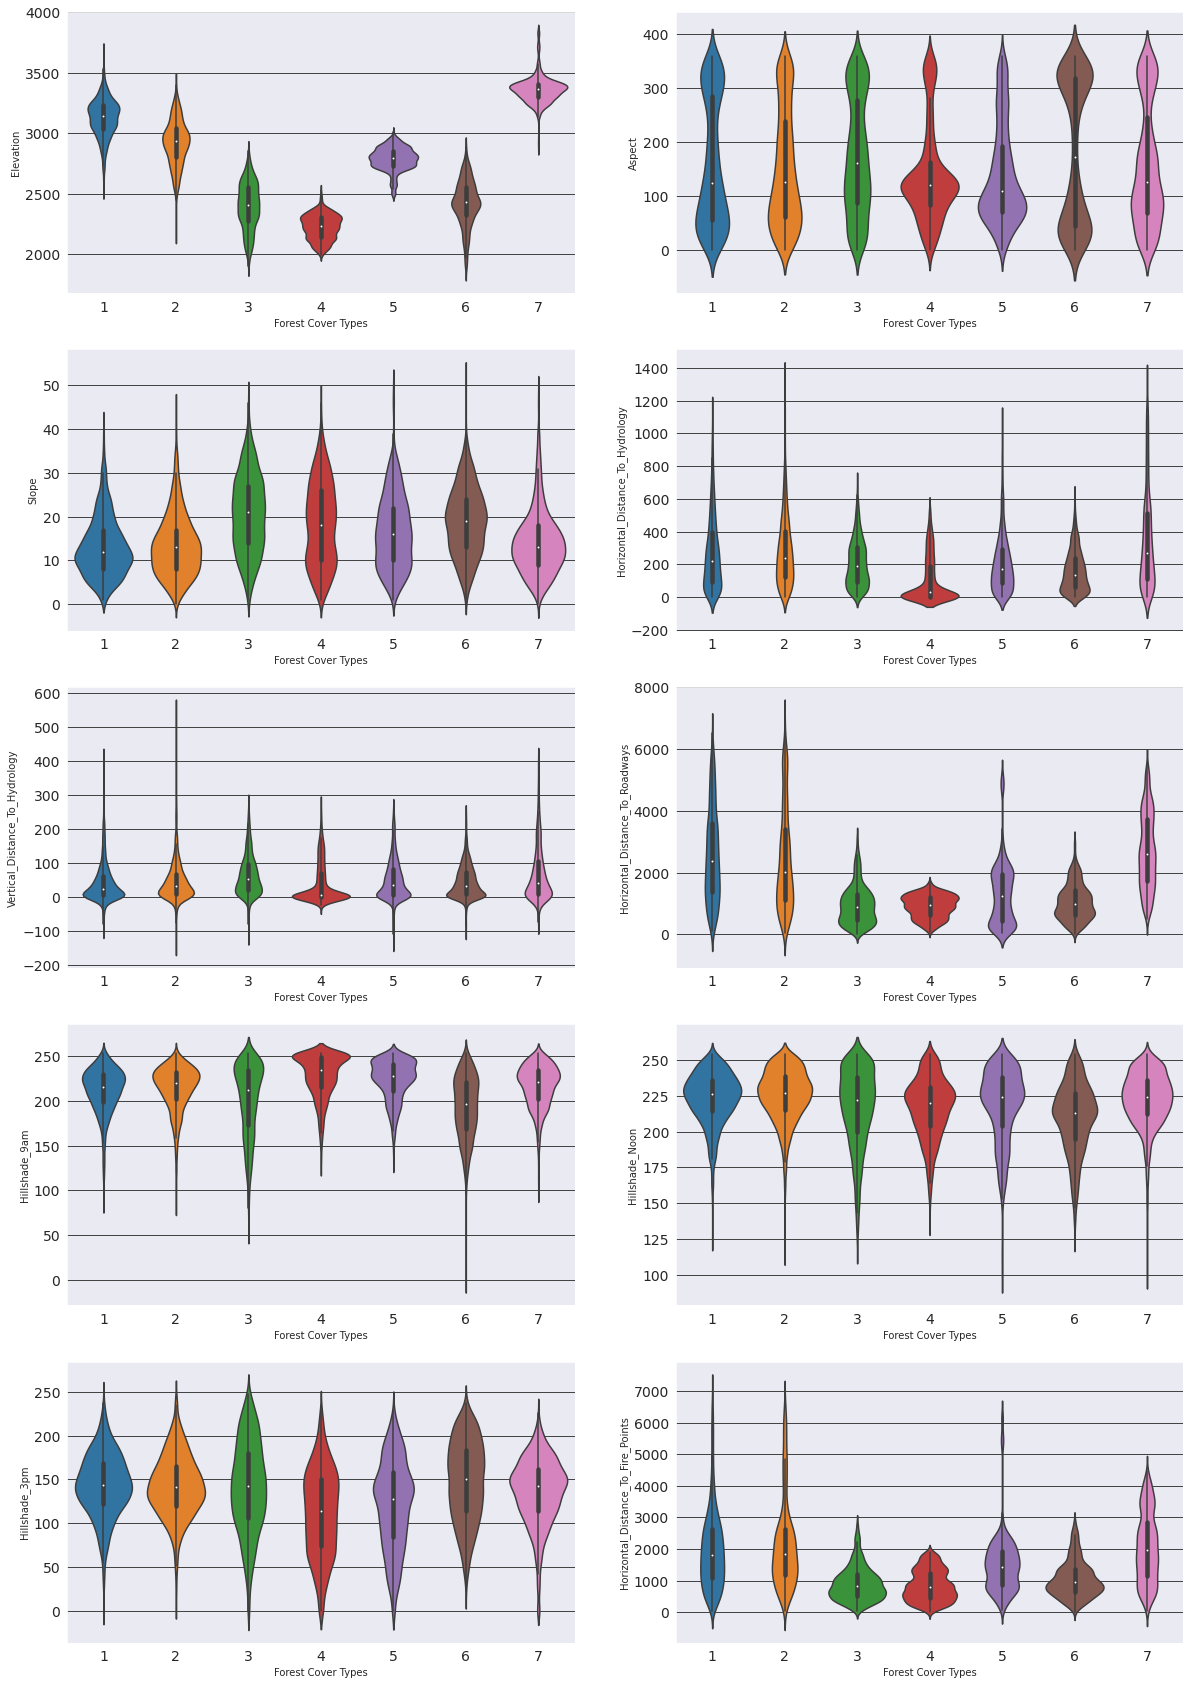

In [18]:
# plot bg
sns.set_style("darkgrid", {'grid.color': '.1'})

# set target variable
target = train['Cover_Type']

# features to be compared with target variable
features = num_features.columns

plt.figure(figsize = [20,30])

# loop for violin plot
for i in range(0, len(features)):
    plt.subplot(5,2,1+i)
    sns.violinplot(data=num_features, x=target, y=features[i])
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.xlabel('Forest Cover Types')
    plt.ylabel(features[i])

plt.show()

### Barplot 4.2 Distribution of `Wilderness_Area` by `Cover_Type` Inferences:
- `Wilderness_Area1` belongs to forest `Cover_Type1`, `Cover_Type2`, `Cover_Type5`, and `Cover_Type7`.
- `Wilderness_Area2` belongs to forest `Cover_Type1`, and `Cover_Type2`.
- `Wilderness_Area3` belongs to all classes except `Cover_Type4`.
- `Wilderness_Area4` belongs to forest `Cover_Type2`, `Cover_Type3`, `Cover_Type4`, and `Cover_Type6`.
- Overall `Wilderness_Area2` has these least amount of Cover_Type observations out of all Wilderness Areas.

In [19]:
cols = train.columns
r,c = train.shape

# Create a new dataframe with r rows, one column for each encoded category[Wilderness_Area(1-4),Soil_type[1-40], and target in the end
new_train = pd.DataFrame(index= np.arange(0,r), columns=['Wilderness_Area', 'Soil_Type', 'Cover_Type'])

In [20]:
# make an entry in data for each r for category_id, target_value
for i in range(0,r):
    p = 0;
    q = 0;
    # wilderness_area range
    for j in range(11,15):
        if (train.iloc[i,j] == 1):
            p = j-10
            break
    # soil_type range
    for k in range(15,55):
        if (train.iloc[i,k] == 1):
            q = k-14
            break
    # make entry in data for each r
    new_train.iloc[i] = [p,q,train.iloc[i, c-1]]

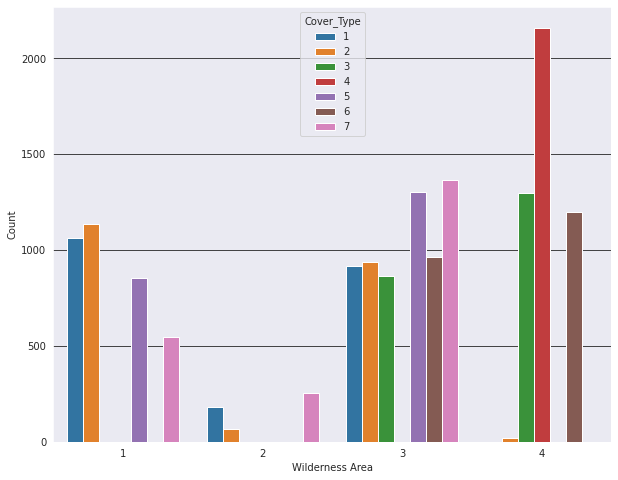

In [21]:
# plot wilderness_area by cover_type
plt.figure(figsize = [10,8])
sns.countplot(x='Wilderness_Area', hue='Cover_Type', data=new_train)
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.show()

### BarPlot 4.3 Understanding `Cover_Type` Distribution Among `Wilderness_Areas`:
**Inferences:**
- `Cover_Type1,2,7` mostly found in `Wilderness_Area1,2, and 3`.
- It is likely to find `Cover_Type3` in `Wilderness_Area4` rather than other areas.
- `Cover_Type4` seems to be found only in `Wilderness_Area4`.
- `Cover_Type5` is most likely will come from`Wilderness_Area1,3`.
- `Cover_Type3,6` are found in `Wilderness_Area3,6`.

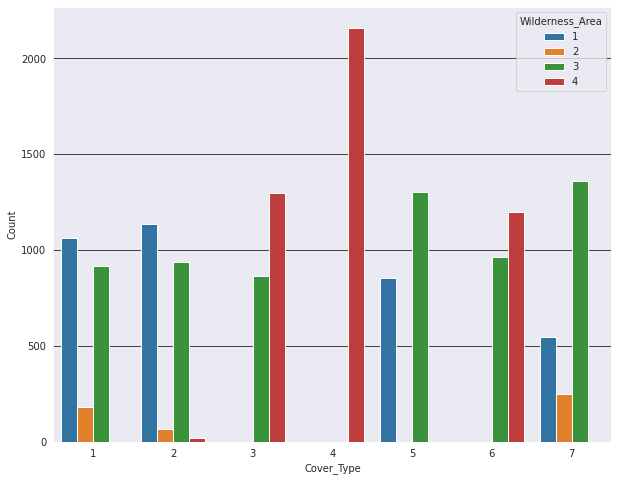

In [22]:
# plot cover_type by wilderness_area
plt.figure(figsize = [10,8])
sns.countplot(x='Cover_Type', hue='Wilderness_Area', data=new_train)
plt.xlabel('Cover_Type')
plt.ylabel('Count')
plt.show()

### BarPlot 4.4 Distribution of Cover Type by Soil Type 
**Inferences:**
- `Soil_Type4` is the only soil type that has presence in all forest cover types.
- `Soil_Type`: 7 and 15 visually, have little to no presence in all forest cover types.
- `Soil_Type`: 3 and 6 has presence in `Cover_Type`: 2, 3, 4, 6
- `Soil_Type3` has the most presence in `Cover_Type4`.
- `Soil_Type10` has the most presence in `Cover_Type6`.
- `Soil_Type`: 10, 11, 16, and 17 and has presence in `Cover_Type` 1 thru 6.
- `Soil_Type`: 23, 24, 31 and 33 has presence in `Cover_Type`: 1, 2, 5, 6, 7.
- `Soil_Type`: 29 and 30, has presence in `Cover_Type`: 1, 2, 5, 7.
- `Soil_Type`: 22, 27, 35, 38, 39, and 40 has presence in `Cover_Type`: 1, 2, and 7.
- `Soil_Type`: 18 and 28 has presence in `Cover_Type`: 2 and 5.
- `Soil_Type`: 19 and 26 has presence in `Cover_Type`: 1, 2, and 5.
- `Soil_Type`: 8 and 25 has presence in only `Cover_Type2`.
- `Soil_Type`: 1, 5, and 14 has presence in `Cover_Type`: 3, 4, and 6.
- `Soil_Type37` has presence in `Cover_Type7`.


- `Cover_Type4` has the least amount of `Soil_Type` count.
- `Cover_Type2` has the most presence in `Soil_Type` count.

In [23]:
palette = ['orchid', 'lightcoral', 'orange', 'gold', 'lightgreen', 'deepskyblue', 'cornflowerblue']

In [24]:
st_by_ct = pd.crosstab(new_train['Cover_Type'], new_train['Soil_Type'])

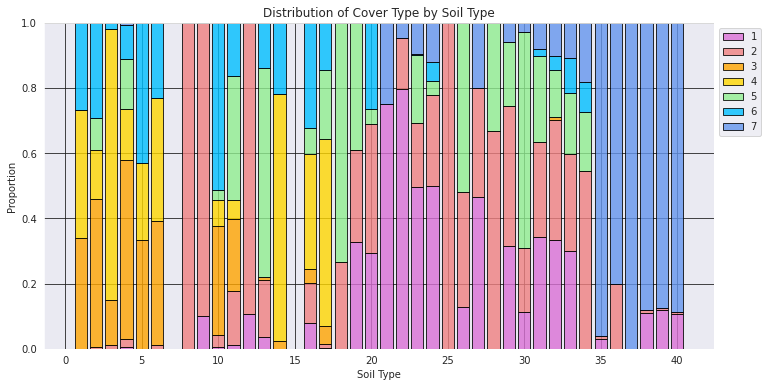

In [25]:
st_by_ct_props = st_by_ct/np.sum(st_by_ct)
bb = np.cumsum(st_by_ct_props) - st_by_ct_props

plt.figure(figsize = [12,6])
for row_indx in range(len(st_by_ct_props)):
    plt.bar(st_by_ct_props.columns.values,
            st_by_ct_props.iloc[row_indx].values,
            bottom = bb.iloc[row_indx].values,
            color = palette[row_indx],
            alpha = 0.8,
            edgecolor = 'black',
            label = st_by_ct_props.index[row_indx]
            )
plt.title('Distribution of Cover Type by Soil Type')
plt.legend(bbox_to_anchor=(1,1))
plt.xlabel('Soil Type')
plt.ylabel('Proportion')
plt.show()

# Feature Correlation
Part of our data is binary. A **correlation matrix** requires continuous data, so we will exclude binary data.


- Features that less or no correlation will be indicated by the color **black**.
- Features with positive correlation are colored **orange**.
- Features with negative correlation are colored **blue**.


### Correlation Plot #5 
**Inferences:**
- `Hillshade_3pm` and `Hillshade_9am` show a high negative correlation.
- `Hillshade_3pm` and `Aspect` show a high positive correlation.
- `Hillshade_3pm` and `Aspect` also had the most normal distribution compared to forest cover type classes (**Plot 4.1**)
- The following pairs had a positive correlation:
    - `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology`
    - `Horizontal_Distance_To_Roadways` and `Elevation`
    - `Hillshade_3pm` and `Aspect`
    - `Hillshade_3pm` and `Hillshade_Noon`
- The following pairs had a negative correlation:
    - `Hillshade_9am` and `Aspect`
    - `Hillshade_Noon` and `Slope`
- The following pair has no correlation:
    - `Hillshade_9am` and `Horizontal_Distance_To_Roadways`
- The least correlated value tells us that each feature has different valuable information that could be important features for predictions.

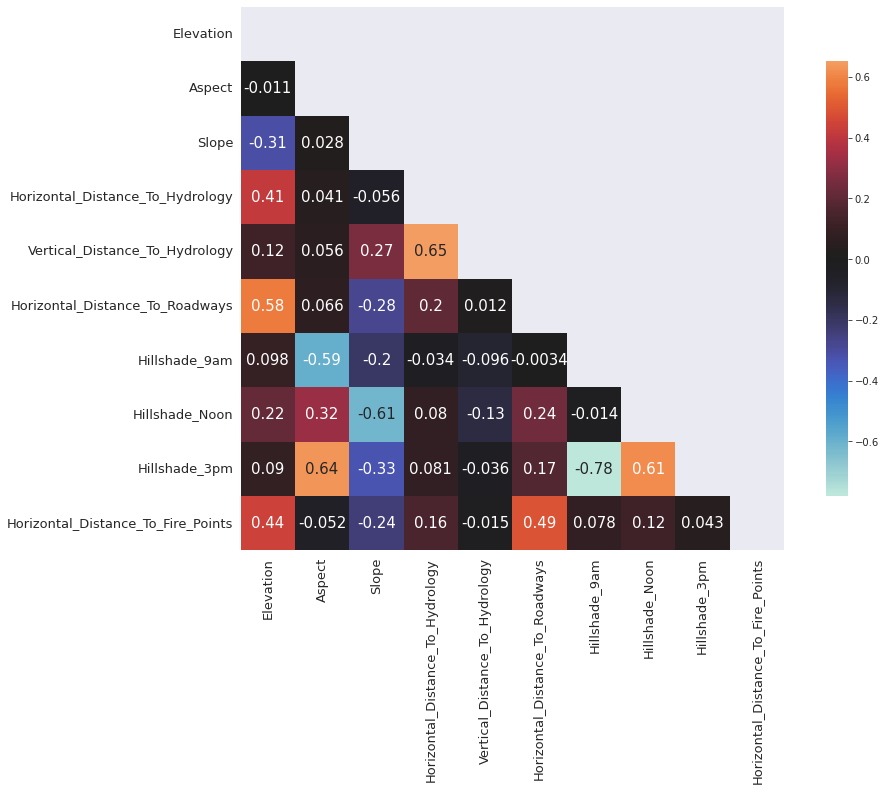

In [26]:
plt.subplots(figsize=(15,10))

# compute correlation matrix
num_features_corr = num_features.corr()

# generate mask for upper triangle
mask = np.zeros_like(num_features_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# generate heatmap masking the upper triangle and shrink the cbar
sns.heatmap(num_features_corr, mask=mask, center=0, square=True, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8})
plt.xticks(size=13)
plt.yticks(size=13)

plt.show()

### Scatterplot #6 Features with correlation greater than 0.5
Let's look at the paired features with correlation greater than 0.5. These will be the feature pairs with a positive correlation.

**Inferences:**
- `Hillshade_3pm` and `Aspect` represent a **sigmoid function** relationship. The data points at the boundaries mostly belong to `Cover_Type`: 3, 4, 5.
- `Vertical_Distance_To_Hydrology` and `Horizontal_Distance_To_Hydrology` represent a **linear function** but more spread out.
    - `Cover_Type`: 1, 2, 7 have more observations spreaded out.
    - `Cover_Type`: 3, 4, 5, 6 are mode densely packed from 0-600m Horizontal_Distance_To_Hydrology
- `Elevation` and `Horizontal_Distance_To_Roadways` is a spread out **linear function**.
    - `Cover_Type` 1, 2, and 7 has the highest elevation and a widespread of points from 0m to ~7000m `Horizontal_Distance_To_Roadways`
    - `Cover_Type` 4 and 6 have a densed dataset where there is both low elevation and horizontal distance to roadways in meters.
- `Hillshade_Noon` and `Hillshade_3pm`
    - `Cover_Type` 1, 2, 6 and 7 have a higher hillshade index at noon and 3pm.
    - `Cover_Type` 4 and 5 have a lower hillshade index at noon and 3pm.

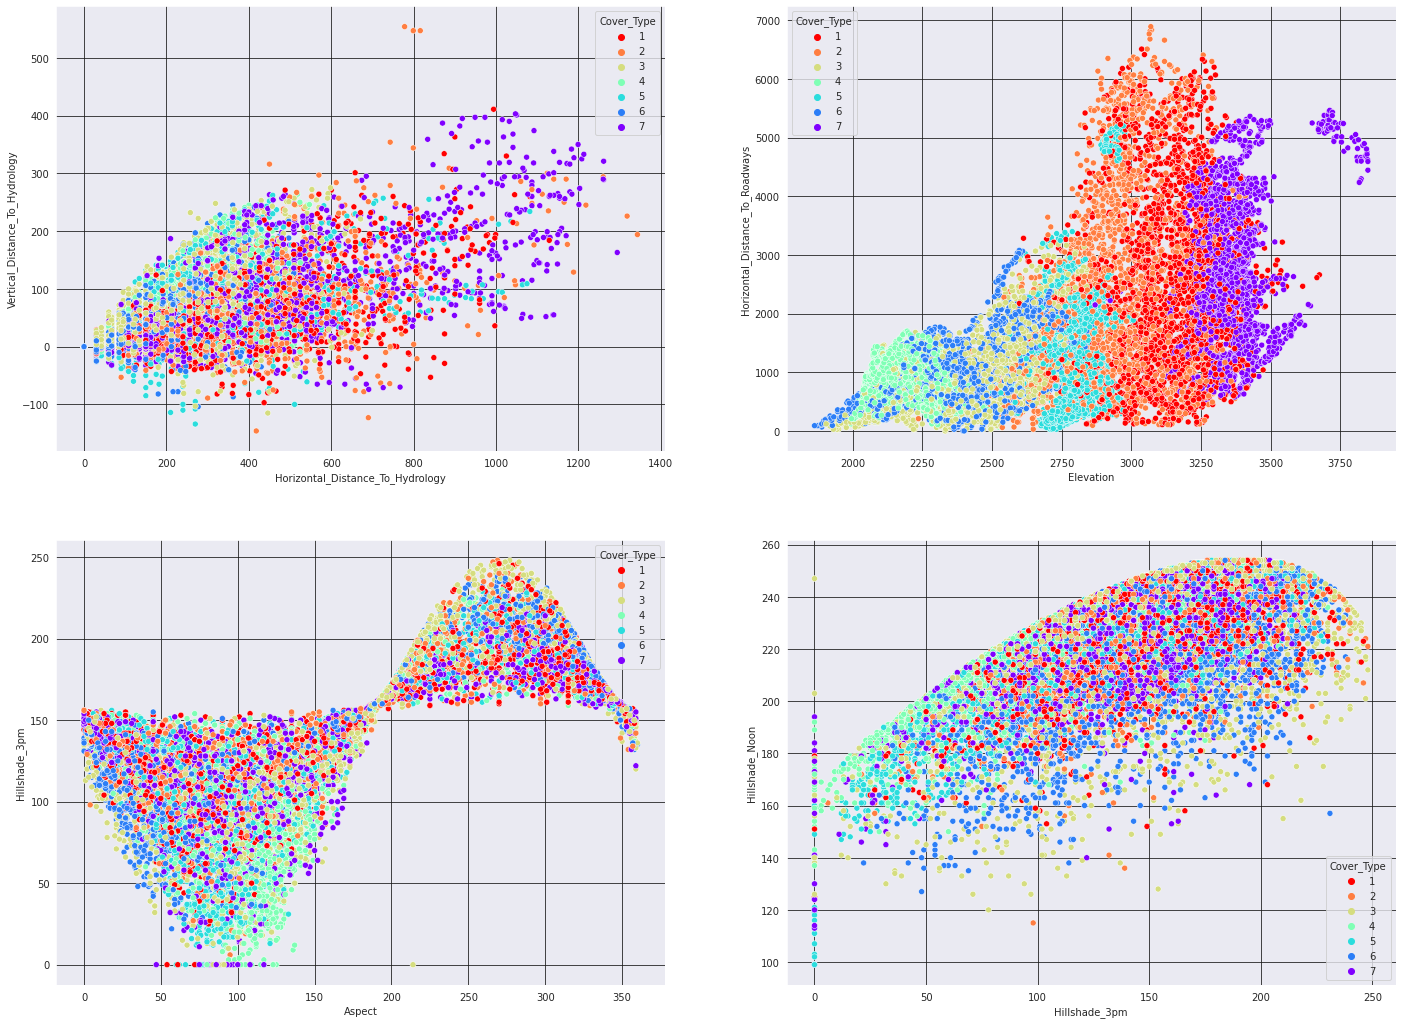

In [27]:
fig, ax = plt.subplots(2,2, figsize=(24,18))

sns.scatterplot(data=train, x="Horizontal_Distance_To_Hydrology", y="Vertical_Distance_To_Hydrology", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,0])
sns.scatterplot(data=train, x="Elevation", y="Horizontal_Distance_To_Roadways", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[0,1])
sns.scatterplot(data=train, x="Aspect", y="Hillshade_3pm", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,0])
sns.scatterplot(data=train, x="Hillshade_3pm", y="Hillshade_Noon", hue="Cover_Type", legend='full', palette='rainbow_r', ax=ax[1,1])
plt.show()

### Top Correlated Features by `Cover_Type` by **One-Hot encoding**
This heatmap of the top correlated features is a great transition into how these original features can be engineered to better predict the forest cover type in the future models.

In [28]:
# create dictionary for cover_type
class_dict = {
    1:'Spruce/Fir',
    2:'Lodgepole Pine',
    3:'Ponderoas Pine',
    4:'Cottonwood/Willow',
    5:'Aspen',
    6:'Douglas-fir',
    7:'Krummholz'
}

# map the integers to their names
train['Cover_Type_Name'] = train['Cover_Type'].map(class_dict)

# one-hot encoding
train_updated = pd.concat([train, pd.get_dummies(train['Cover_Type_Name'], prefix='Type')], axis=1)

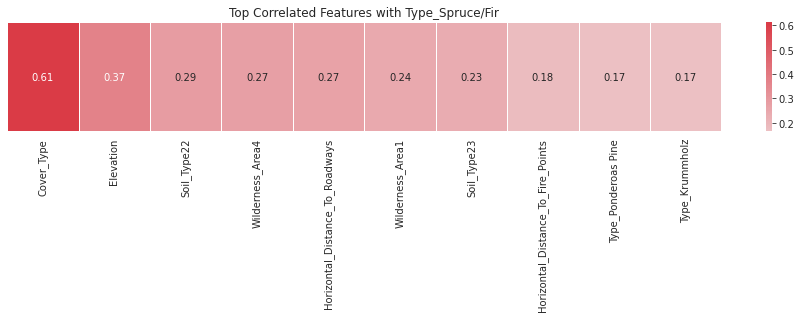

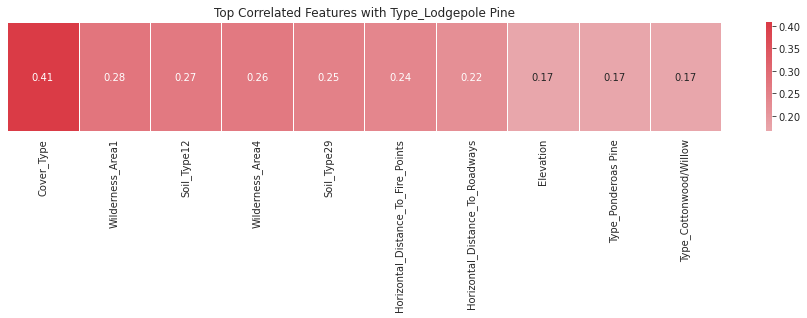

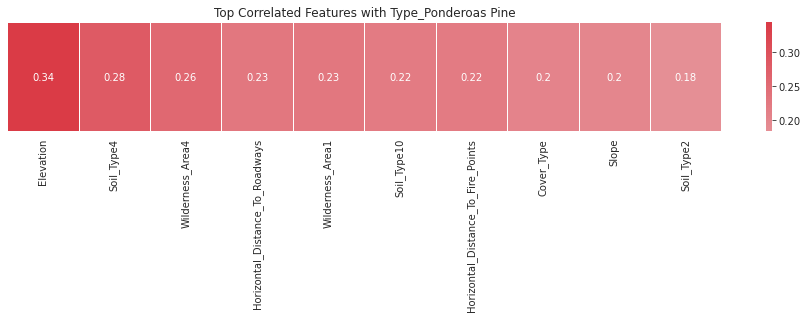

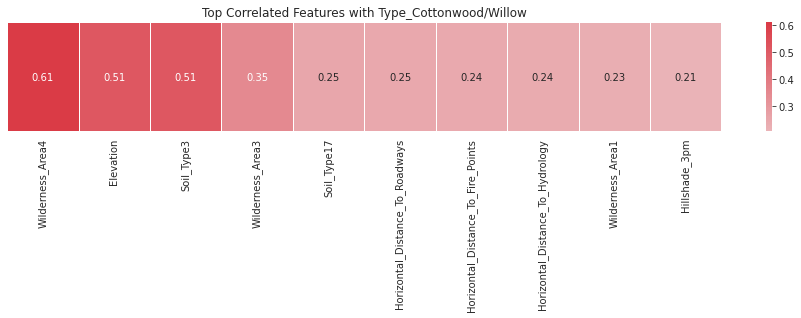

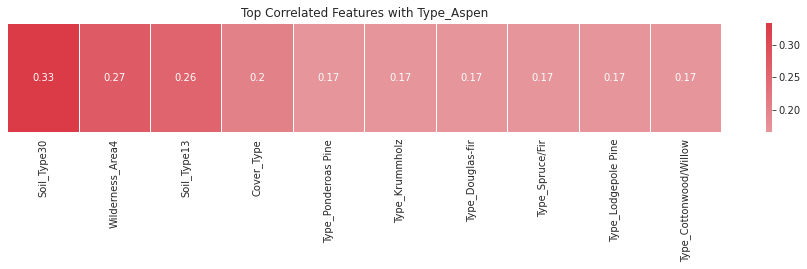

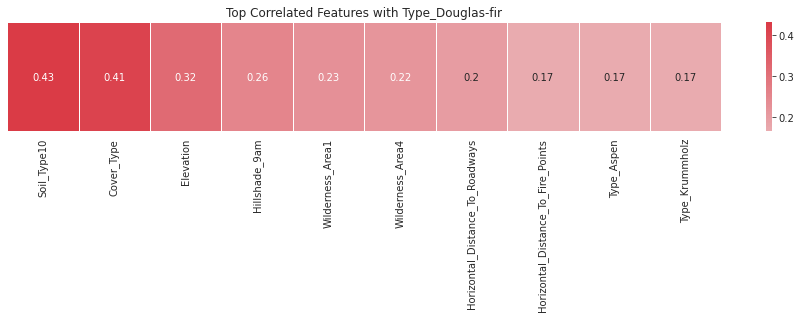

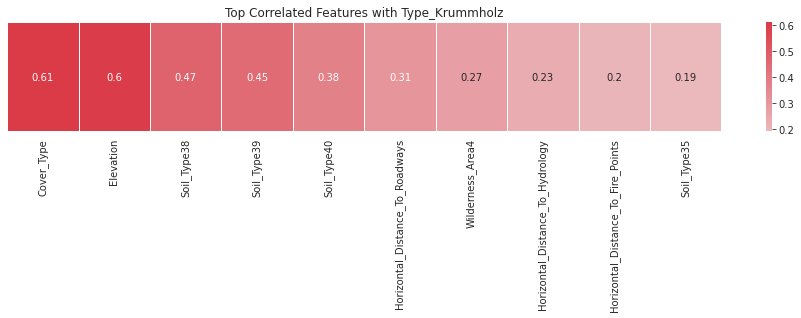

In [29]:
all_corr = train_updated.corr()

# plot the top correlated features by cover_type

plt.rcParams['figure.figsize'] = [16,2]

for cov in class_dict.values():
    
    cov_str = 'Type_' + cov
    type_corr = all_corr[[cov_str]].apply(abs).sort_values(by=cov_str, ascending=False)
    
    sns.heatmap(type_corr.iloc[1:11,:].transpose(),
                annot = True,
                cmap = sns.diverging_palette(220, 10, as_cmap=True),
                center = 0,
                linewidth = 0.5)
    plt.yticks([])
    plt.title('Top Correlated Features with {}'.format(cov_str)),
    plt.show()

# Further Visualizations: T-SNE, PCA
TSNE and PCA allows us to reduce the dimensionality of a dataset while preserving the most information in the dataset. It will also allow us to increase the interpretability of the data in the lower dimension and minimize information loss. This section will allow us to do further visualization of the location variables and see if they are more correlated to the target variables.

The location variables `location_vars` are the following:
- `Elevation`
- `Aspect`
- `Slope`
- `Horizontal_Distance_To_Hydrology`
- `Vertical_Distance_To_Hydrology`
- `Horizontal_Distance_To_Roadways`
- `Horizontal_Distance_To_Fire_Points`

### Key Findings from T-SNE plot:
- `Cover_Type3` Ponderosa Pine, `Cover_Type4` Cottonwood/Willow and `Cover_Type6` Douglas-fir are evenly distributed overlapping versus other cover types.
- `Cover_Type2` Lodgepole, `Cover_Type1` Spruce/Fir, and `Cover_Type7` Krummholz have a similar distribution as well.
- `Cover_Type5` Aspen seems to be a subset of `Cover_Type1` Spruce/Fir, `Cover_Type2` Lodgepole Pine, and `Cover_Type7` Krummholz which means it may be hard to identify Aspen based on the location variables.

In [30]:
location_vars = ['Elevation','Aspect','Slope','Horizontal_Distance_To_Hydrology',
                 'Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
                 'Horizontal_Distance_To_Fire_Points']

In [31]:
# utitlity function to visualize the output of PCA and T-SNE

def fashion_scatter(x, labels):
    # choose a color palette with seaborn
    num_classes = len(np.unique(labels.values))
    palette = np.array(sns.color_palette("hls", num_classes))
    
    # create a scatter plot
    f = plt.figure(figsize=(8,8))
    ax = plt.subplot(aspect='equal')
    
    for i in range(num_classes):
        index = labels.loc[labels == i + 1].index
        sc = ax.scatter(x[index,0], x[index,1], lw=0, s=30, c=palette[i], label=class_dict[i+1])
    plt.xlim(-25,25)
    plt.ylim(-25,25)
    ax.axis('tight')
    ax

### PCA with 2 Principal Components

Total explained variance ratio (based on 2 components) = 0.95


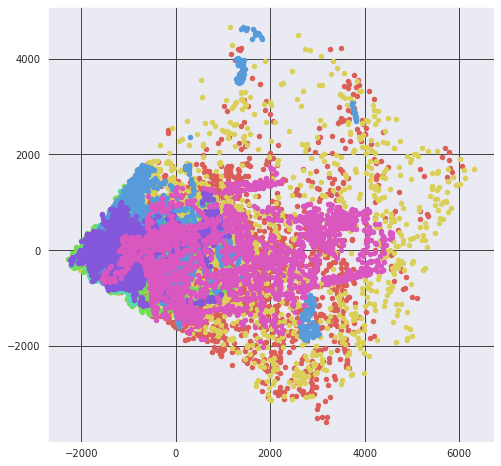

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_updated.loc[:,location_vars])
print("Total explained variance ratio (based on 2 components) = {:.2f}".format(pca.explained_variance_ratio_.sum()))

pca_df = pd.DataFrame(pca_result,columns=['PCA1','PCA2'])
pca_df = pd.concat([pca_df,train_updated['Cover_Type']],axis=1)

fashion_scatter(pca_df.loc[:,['PCA1','PCA2']].values, pca_df['Cover_Type'])

### TSNE

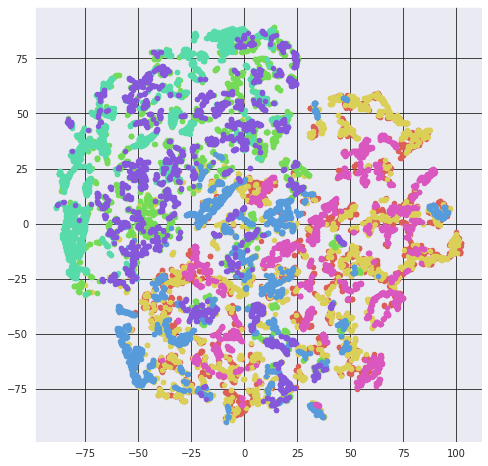

In [33]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=234).fit_transform(train_updated.loc[:,location_vars])
fashion_scatter(tsne, pca_df['Cover_Type'])

# Next Steps

We continue this project with the following notebooks:
- [[G2] ForestCoverType_Report Notebook](https://www.kaggle.com/jamiesperos/g2-forestcovertype-report-notebook)
- [[G2] ForestCoverType_FeatureEngineering Notebook](https://www.kaggle.com/jamiesperos/g2-forestcovertype-feature-engineering-notebook/)
- [[G2] ForestCoverType_Training Notebook](https://www.kaggle.com/emknowles/g2-forestcovertype-training-notebook/)
- [[G2] ForestCoverType_ModelParams Notebook](https://www.kaggle.com/emknowles/g2-forestcovertype-modelparams-notebook/)
- [[G2] ForestCoverType_FinalModelEvaluation Notebook](https://www.kaggle.com/emknowles/g2-forestcovertype-finalmodelevaluation-notebook)
- [[G2] ForestCoverType_Submission Notebook](https://www.kaggle.com/emknowles/g2-forest-cover-type-submission-v05)